1. Installed scikit-learn library via pip process
2. Import libraries and dataframe
3. Data cleaning
4. Prep data for regression analysis
5. Explore data
6. Reshape variables
7. Split data into training/test
8. Run a linear regression
9. Create a plot that shows the regression on the test set
10. Interpret the fit
11. Check the model stats MSE & R2 score
12. Compare the predicted y values with actual y values in datatframe
13. Document how well the model performed on the test set

## 2. Import libraries and dataframes

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Makes graphs able to be displayed in notebook
%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\dodge\24-08-27 Transportation'

In [4]:
#import dataframe
df_cars_4 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cars_State_Names'), index_col = 0)

In [5]:
df_cars_4.head(10)

,Month_ending,Year,County,State,Primary_use,Battery_BEVs,Hybrid_(PHEVs),EV_Total,Non-Electric_Total,Total_Veh,%_Electric,Proximity,State_Names
0,April,2017,Pinal,AZ,Passenger,2,0,2,254,256,0.78,Nearest,Arizona
1,April,2017,Island,WA,Passenger,108,128,236,59768,60004,0.39,Washington,Washington
2,April,2017,Clark,WA,Truck,0,0,0,77561,77561,0.00,Washington,Washington
3,April,2017,Allegheny,PA,Passenger,1,0,1,93,94,1.06,Furthest,Pennsylvania
4,April,2017,Shelby,TN,Passenger,0,1,1,109,110,0.91,Furthest,Tennessee
5,April,2017,Dale,AL,Passenger,0,1,1,65,66,1.52,Furthest,Alabama
6,April,2017,Jefferson,WA,Passenger,98,56,154,23744,23898,0.64,Washington,Washington
8,April,2017,Harnett,NC,Passenger,1,0,1,257,258,0.39,Furthest,North Carolina
9,April,2017,Salt Lake,UT,Passenger,0,1,1,289,290,0.34,Nearest,Utah
10,April,2017,Yakima,WA,Truck,0,0,0,57219,57219,0.00,Washington,Washington


## 3. Data Cleaning

In [6]:
df_cars_4.columns

Index(['Month_ending', 'Year', 'County', 'State', 'Primary_use',
       'Battery_BEVs', 'Hybrid_(PHEVs)', 'EV_Total', 'Non-Electric_Total',
       'Total_Veh', '%_Electric', 'Proximity', 'State_Names'],
      dtype='object')

In [7]:
df_cars_4.shape

(17886, 13)

In [8]:
#Check for missing values
df_cars_4.isnull().sum()

Month_ending          0
Year                  0
County                0
State                 0
Primary_use           0
Battery_BEVs          0
Hybrid_(PHEVs)        0
EV_Total              0
Non-Electric_Total    0
Total_Veh             0
%_Electric            0
Proximity             0
State_Names           0
dtype: int64

In [9]:
#Check for duplicates
dups = df_cars_4.duplicated()

In [10]:
dups.shape

(17886,)

In [11]:
#No missing values or complete duplicates

C:\Users\dodge\AppData\Local\Temp\ipykernel_15900\3212711703.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cars_4['%_Electric'], bins=25)


<Axes: xlabel='%_Electric', ylabel='Density'>

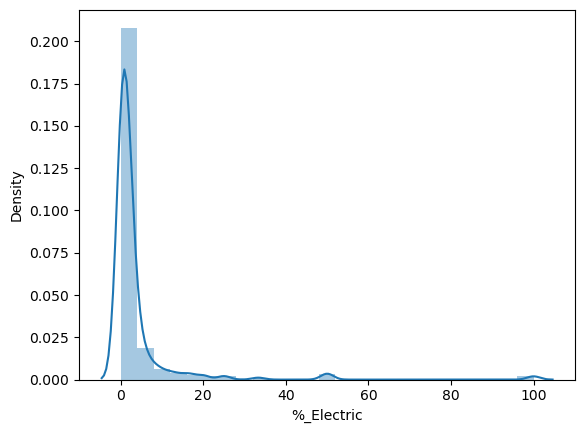

In [12]:
#Check for extreme values
sns.distplot(df_cars_4['%_Electric'], bins=25)

In [13]:
#Separate dataframe into WA vehicles registered in WA and non-WA vehicles registered in WA to eliminate extremes
df_cars_WA = df_cars_4[df_cars_4['Proximity']=='Washington']

In [14]:
df_cars_WA.shape

(6162, 13)

In [15]:
df_cars_out = df_cars_4[df_cars_4['Proximity']!='Washington']

In [16]:
df_cars_out.shape

(11724, 13)

C:\Users\dodge\AppData\Local\Temp\ipykernel_15900\4195969619.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cars_WA['%_Electric'], bins=25)


<Axes: xlabel='%_Electric', ylabel='Density'>

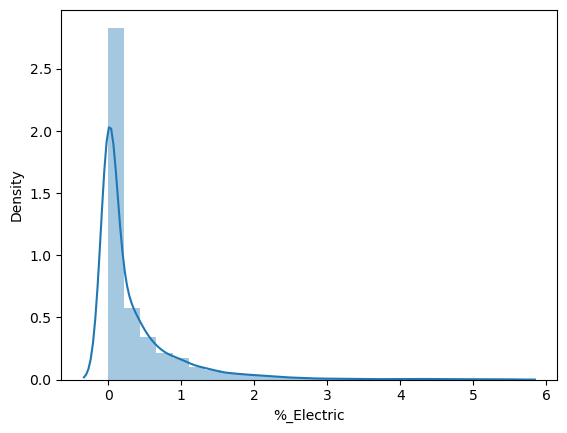

In [17]:
#Check for extreme values WA
sns.distplot(df_cars_WA['%_Electric'], bins=25)

C:\Users\dodge\AppData\Local\Temp\ipykernel_15900\2761303134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cars_out['%_Electric'], bins=25)


<Axes: xlabel='%_Electric', ylabel='Density'>

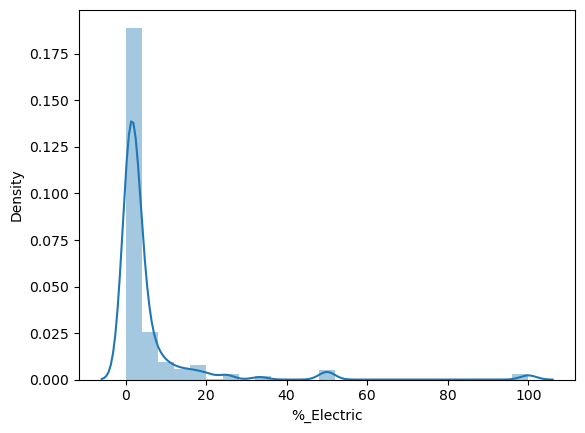

In [18]:
#Check for extreme values outside WA
sns.distplot(df_cars_out['%_Electric'], bins=25)

In [19]:
# Document mean, median, max for % electric vehicles in WA
df_cars_WA['%_Electric'].mean()

0.3511262577085362

In [20]:
df_cars_WA['%_Electric'].median()

0.07

In [21]:
df_cars_WA['%_Electric'].max()

5.51

In [22]:
#Document mean, median, max for % electric vehicles outside WA
df_cars_out['%_Electric'].mean()

5.685663596042306

In [23]:
df_cars_out['%_Electric'].median()

1.84

In [24]:
df_cars_out['%_Electric'].max()

100.0

I think context is important; these do not represent all the registered vehicles in an area outside of WA, only the registered vehicles in WA where the registered owner has a home address in that outside state.

### 4. Prep data for regression analysis

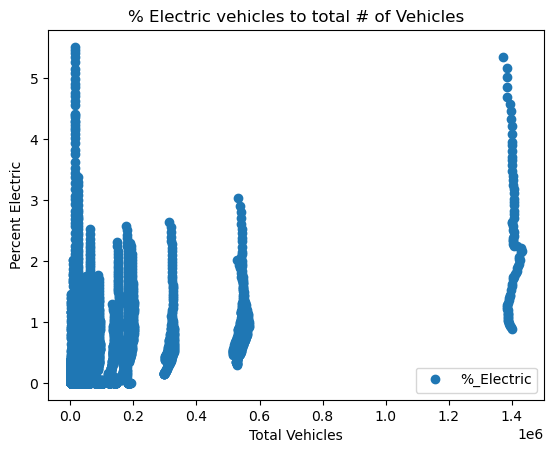

In [25]:
# Create a scatterplot using matplotlib to look at WA vehicles % Electric to Total Vehciles

df_cars_WA.plot(x = 'Total_Veh', y = '%_Electric', style = 'o')
plt.title('% Electric vehicles to total # of Vehicles')
plt.xlabel('Total Vehicles')
plt.ylabel('Percent Electric')
plt.show()

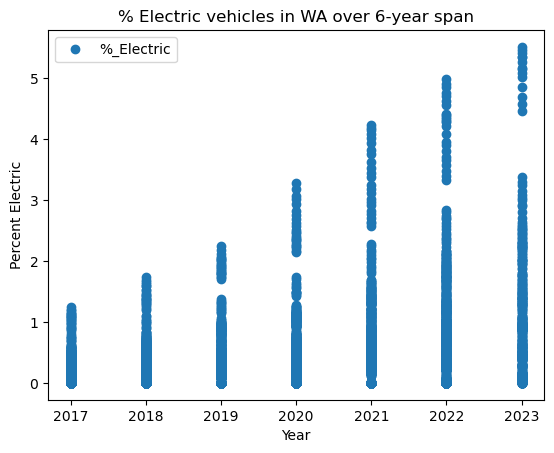

In [26]:
#Create a scatterplot using matplotlib to look at %EV in WA over the years

df_cars_WA.plot(x = 'Year', y = '%_Electric', style = 'o')
plt.title('% Electric vehicles in WA over 6-year span')
plt.xlabel('Year')
plt.ylabel('Percent Electric')
plt.show()

### 5. Hypothesis:  % electric vehicles are replacing non-electric vehicles, so the percentage will go up while the number of total vehicles flattens.

### 6. Reshape the variables

#Reshape the variables into NumPy arrays and put them into separate objects

X = df_cars_WA['Total_Veh'].values.reshape(-1,1)
y = df_cars_WA['%_Electric'].values.reshape(-1,1)

In [27]:
#Reshape the variables into NumPy arrays and put them into separate objects

X = df_cars_WA['Total_Veh'].values.reshape(-1,1)
y = df_cars_WA['%_Electric'].values.reshape(-1,1)

In [28]:
X

array([[60004],
       [77561],
       [23898],
       ...,
       [ 3908],
       [ 4426],
       [47468]], dtype=int64)

In [29]:
y

array([[0.39],
       [0.  ],
       [0.64],
       ...,
       [0.  ],
       [0.59],
       [1.09]])

### 7. Split data into training/test

In [30]:
#Split the data into training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Run a linear regression

In [31]:
#Create a regression object to be fit onto the training set
regression = LinearRegression()

In [32]:
#Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
#Predict the values of y using X
y_predicted = regression.predict(X_test)

### 9. Create a plot that shows the regression line on the test set

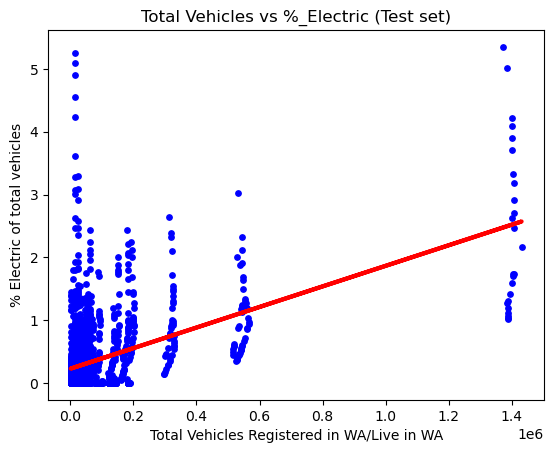

In [34]:
#Create plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 3)
plot_test.title('Total Vehicles vs %_Electric (Test set)')
plot_test.xlabel('Total Vehicles Registered in WA/Live in WA')
plot_test.ylabel('% Electric of total vehicles')
plot_test.show()

### 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

There is a lot of points on the % electric vehicles far away from the line that is showing a positive trend.  It is difficult to see correlations in this data set as all the variables provided are related to each other.

### 11. Check the model stats MSE & R2 score

In [35]:
#Create objects that contain model summary statistics
rmse=mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [36]:
#Print model summar statistics to evaluate the performance of the model
print ('Slope: ' , regression.coef_)
print('Mean squared error: ' , rmse)
print('R2 score: ', r2)

Slope:  [[1.63773974e-06]]
Mean squared error:  0.28689020129590903
R2 score:  0.24499877385479918


A positive slope (as noted in the graph), so as the Total Vehicles go up, so does the percentage of electric vehicles.  The mean squared error is small indicating a relationship between the two; a strong relationship.  So, as more vehicles are being registered, a greater percentage are electric.  A small R2 score indicates this model is only a 24% fit, which isn't great.

### 12. Compare the predicted y values with the actual y values

In [37]:
# Create a dataframe comparing the real and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.41,0.534096
1,0.00,0.525245
2,0.78,0.744529
3,0.00,0.236060
4,0.00,0.314766
5,0.00,0.256369
6,0.05,0.316450
7,0.00,0.257260
8,0.23,0.437705
9,0.00,0.249815


### 13. Thoughts on how well the model performed on the test set

The performance was consistent with previous findings and analysis on this data.  The variables have relationships as a part of each other (electric + non-electric = total vehicles).  Other data, such as purchase price of vehicle, new or used, rural or urban, etc. would have all made a well-rounded and phenomenally interesting dataset to analyze.  These tasks have been extremely valuable in understanding how to analyze data such as this in various circumstances.  

No bias' exist in this dataset.

In [38]:
df_cars_WA.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cars_WA.csv'))

In [39]:
df_cars_out.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cars_outside.csv'))